#Principle Component Analysis

# Objective

The objective of this assignment is to explore and analyze the wine.csv dataset by applying various data analysis and machine learning techniques.

#Tasks:
* Understand the structure and relationships within the data through Exploratory Data Analysis (EDA).

* Reduce the dimensionality of the dataset using Principal Component Analysis (PCA) while retaining most of the variance.

* Apply K-means clustering on both the original and PCA-transformed data.

* Compare and evaluate clustering performance on both versions to analyze the impact of dimensionality reduction on clustering.

* Summarize the key findings, insights, and recommendations based on the analysis.

##Introduction

High-dimensional datasets often contain redundant or correlated features that can complicate data analysis and reduce the effectiveness of clustering algorithms. Dimensionality reduction is an essential step to simplify the dataset while retaining its core information.

##Summary
This pipeline covers:

* EDA

* PCA (dimensionality reduction)

* KMeans clustering on both original and PCA data

* Metrics comparison

* Analysis and conclusions

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
# Load the dataset
df = pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Basic exploration
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


To understand the structure, distributions, and relationships within the dataset before applying further techniques. This helps identify outliers, skewness, and feature correlations.

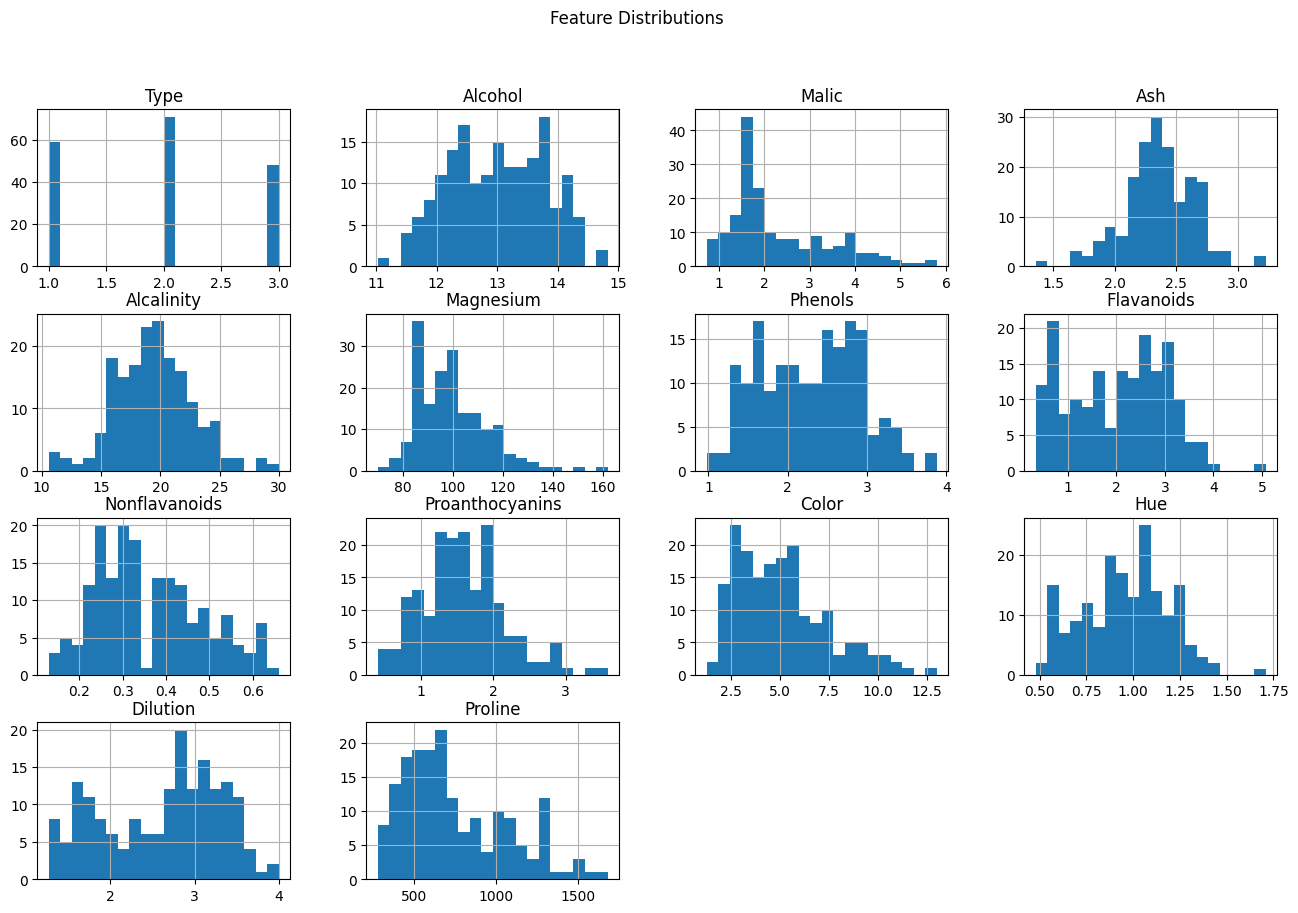

In [ ]:
# Histograms
df.hist(bins=20, figsize=(16,10))
plt.suptitle("Feature Distributions")
plt.show()

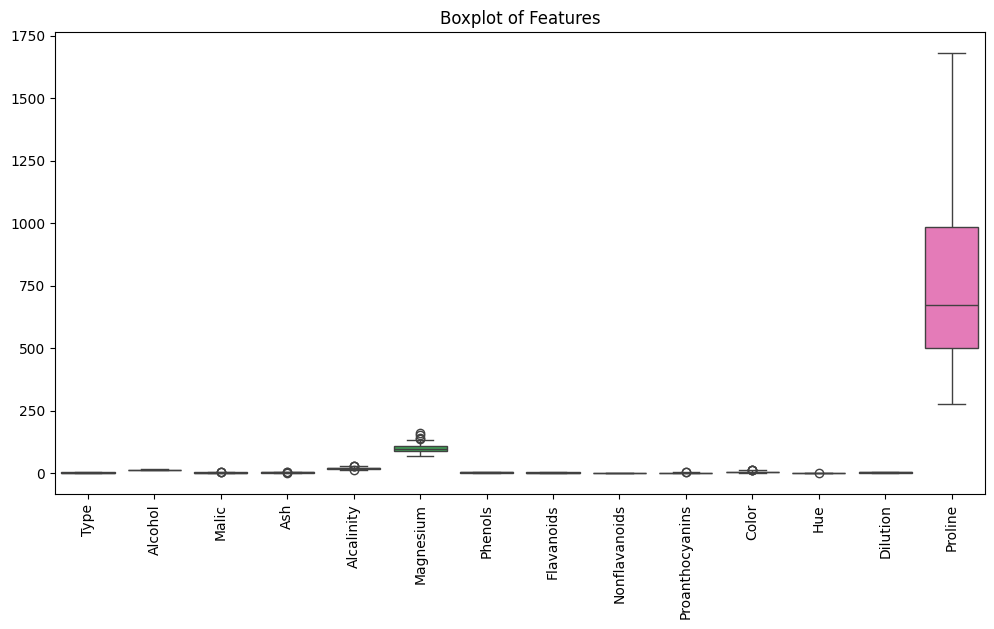

In [ ]:
# Boxplots for all features
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.xticks(rotation=90)
plt.show()

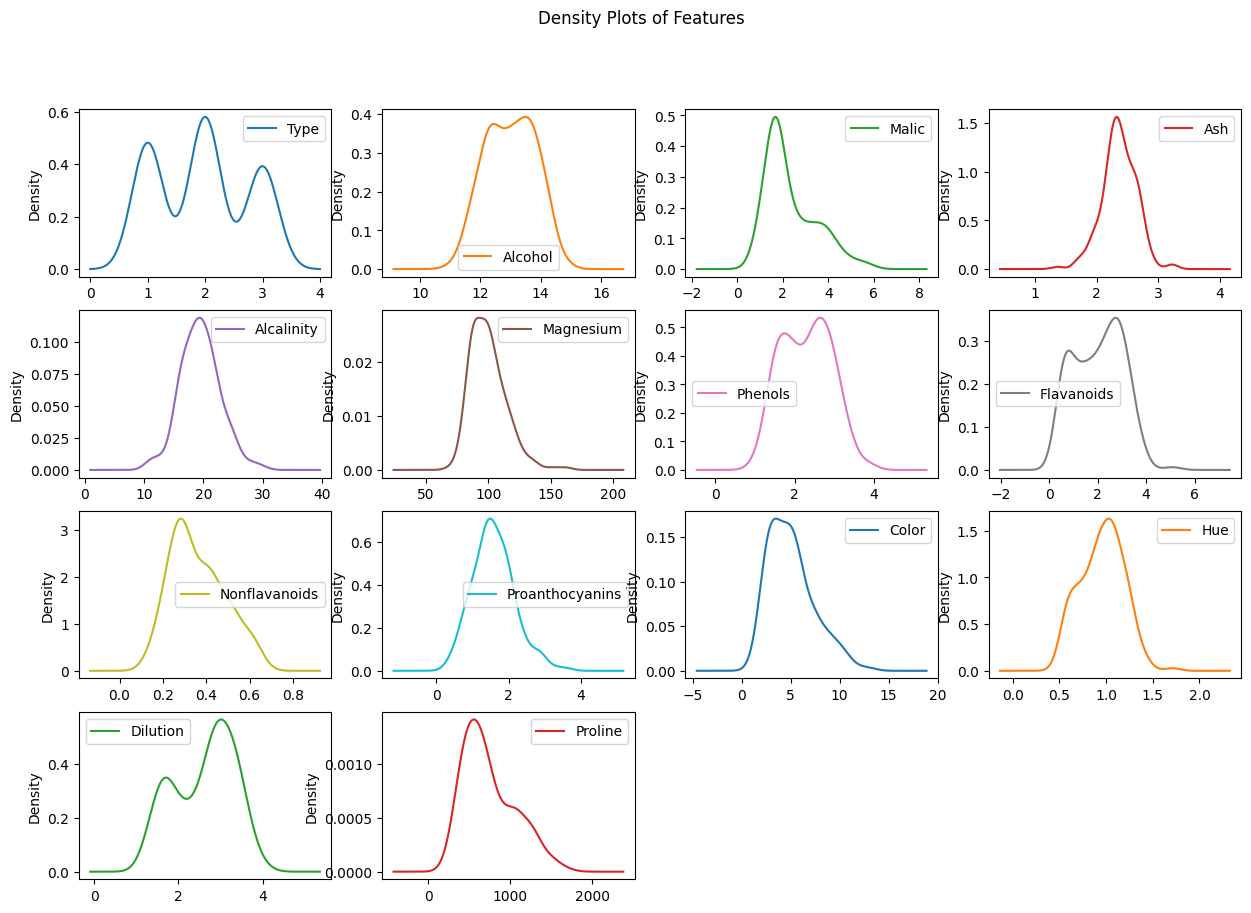

In [ ]:
# Density plots for all features
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(15,10))
plt.suptitle("Density Plots of Features")
plt.show()

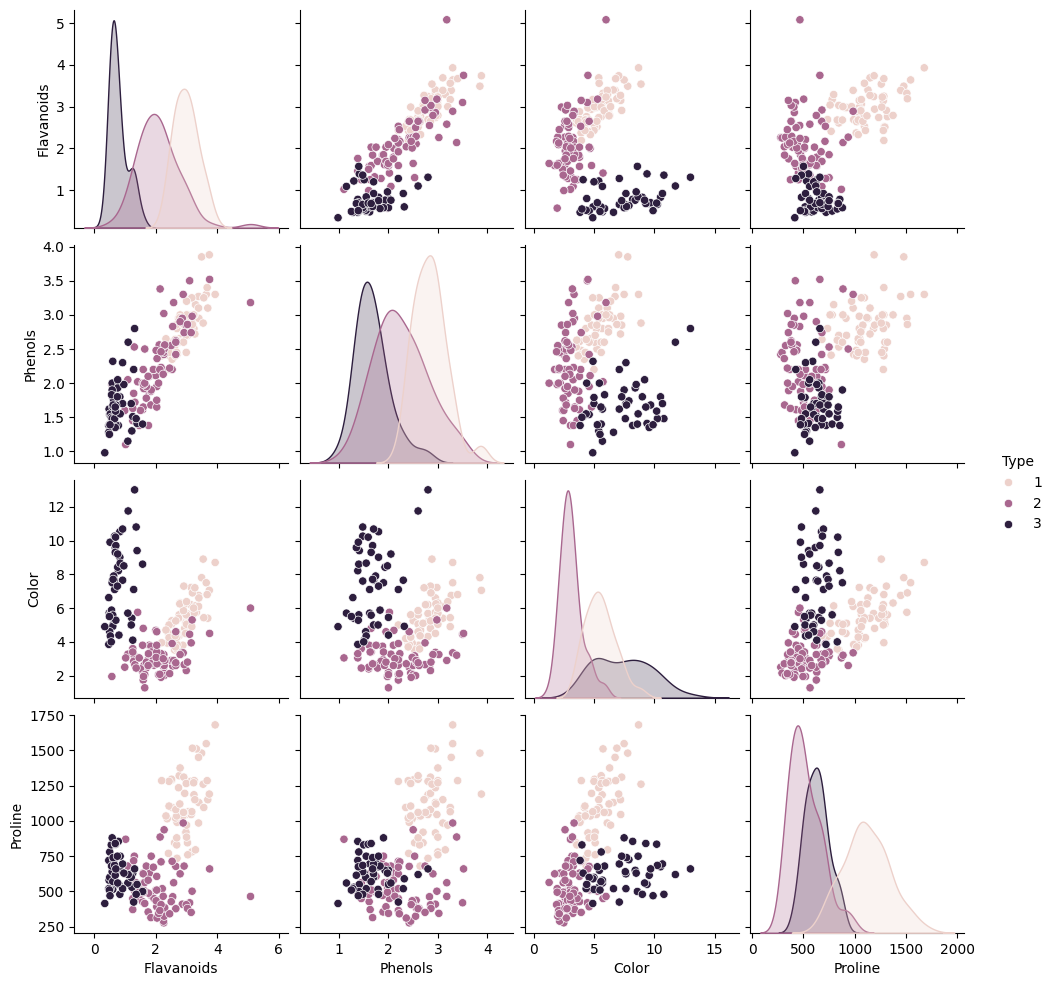

In [ ]:
# Scatterplots for key relationships
sns.pairplot(df, vars=['Flavanoids', 'Phenols', 'Color', 'Proline'], hue='Type')
plt.show()

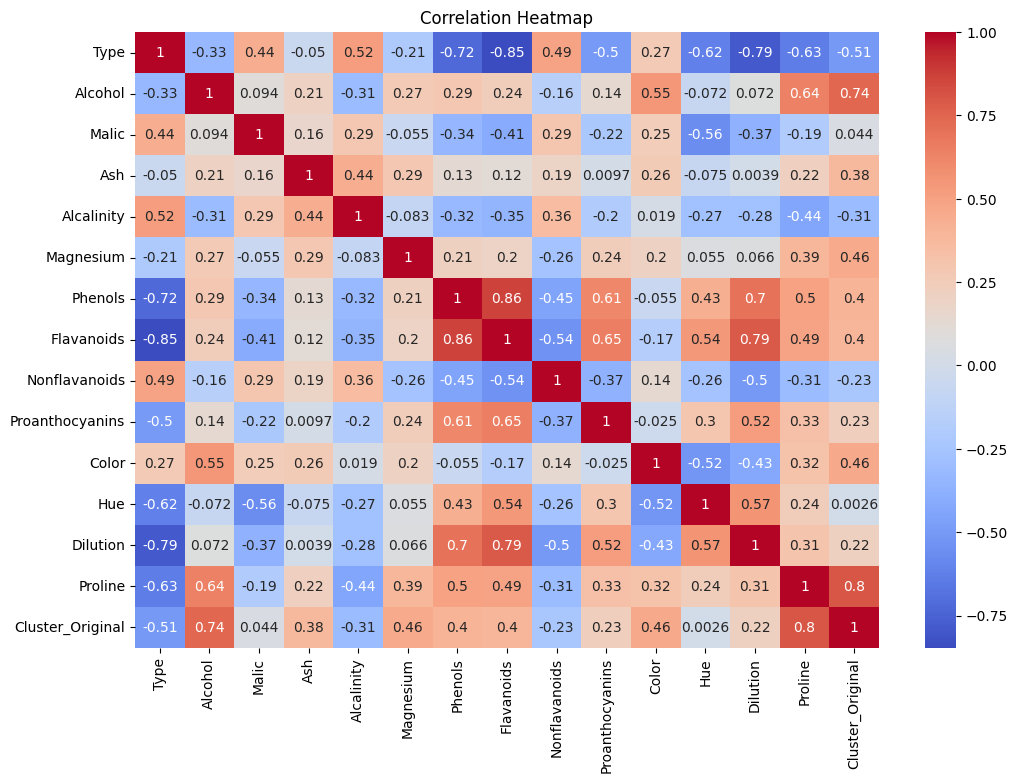

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


##Task 2: Dimensionality Reduction with PCA

Standardize the features

In [ ]:
# Separate features (X)
X = df.values  # using the whole dataset

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check mean and std after scaling
print("Mean after scaling (approx.):", X_scaled.mean(axis=0)[:5])
print("Std after scaling (approx.):", X_scaled.std(axis=0)[:5])

# Convert back to a DataFrame for convenience
import pandas as pd
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)
display(df_scaled.head())

Mean after scaling (approx.): [ 1.59672525e-16 -8.38280756e-16 -1.19754394e-16 -8.37033314e-16
 -3.99181312e-17]
Std after scaling (approx.): [1. 1. 1. 1. 1.]


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_Original
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1.208322
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.208322
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1.208322
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1.208322
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.208322


### Fit PCA and find optimal number of components

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA without specifying n_components to capture all
pca = PCA()
pca.fit(df_scaled)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.35593231, 0.21558747, 0.1034056 , 0.0662495 , 0.06143267,
       0.04796466, 0.03939477, 0.02490837, 0.02135761, 0.01857933,
       0.01621558, 0.01212585, 0.00996938, 0.00687689])

In [ ]:
# Separate features (exclude 'Type')
X = df.drop('Type', axis=1).values

# Standardize only numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check mean and std after scaling
print("Mean after scaling (approx.):", X_scaled.mean(axis=0)[:5])
print("Std after scaling (approx.):", X_scaled.std(axis=0)[:5])

# Convert back to a DataFrame for convenience
df_scaled = pd.DataFrame(X_scaled, columns=df.drop('Type', axis=1).columns)
display(df_scaled.head())


Mean after scaling (approx.): [-8.38280756e-16 -1.19754394e-16 -8.37033314e-16 -3.99181312e-17
 -3.99181312e-17]
Std after scaling (approx.): [1. 1. 1. 1. 1.]


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_Original
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1.208322
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.208322
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1.208322
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1.208322
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.208322


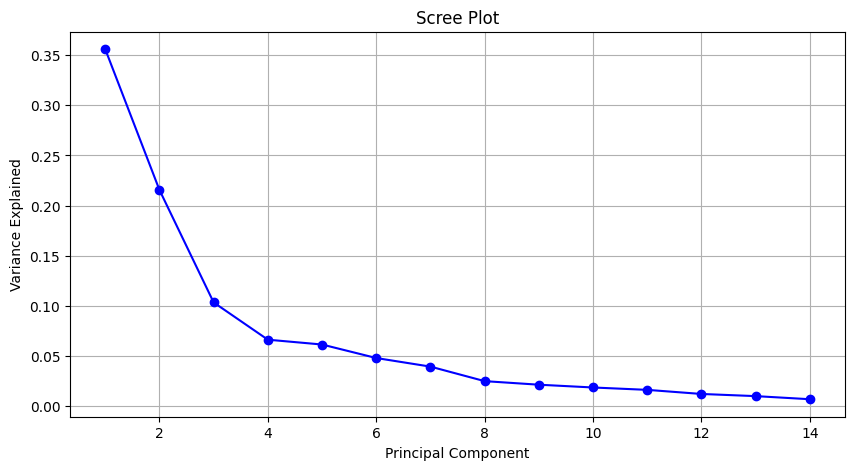

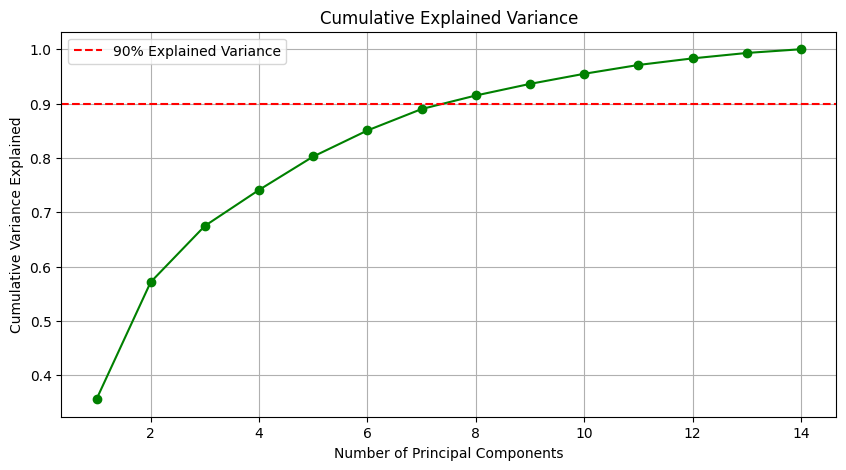

In [ ]:
# Scree plot
plt.figure(figsize=(10,5))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10,5))
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, 'o-', color='green')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


Scree plot is a line graph used in Principal Component Analysis (PCA) and Factor Analysis (FA) to help determine the number of components or factors to retain by plotting their eigenvalues

Interpretation:

* Look for the elbow point on the curve where it starts to flatten.

* Choose the number of components that explain about 90 to 95% variance.

### Transform data into chosen principal components

In [ ]:
# Apply PCA with chosen components
pca_final = PCA(n_components=2)
X_pca = pca_final.fit_transform(X_scaled)

# Create a dataframe for PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
print(pca_df.head())


        PC1       PC2
0 -3.522934  1.453098
1 -2.528858 -0.330019
2 -2.785029  1.036936
3 -3.922588  2.768210
4 -1.407511  0.867773


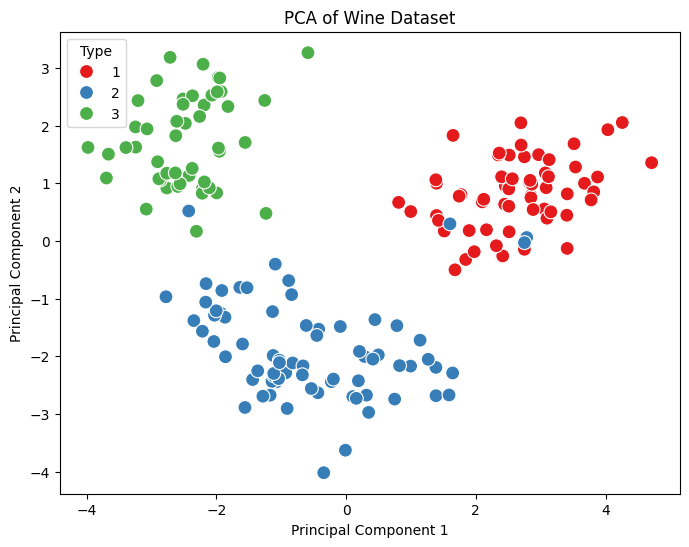

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Type', data=df_pca, palette='Set1', s=100)
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

##Task 3: Clustering with Original Data

###Purpose:
To group similar data points together based on their features, and evaluate how well the data naturally clusters without any dimensionality reduction.

###Apply K-Means clustering on the standardized original data

Prepare the data
We will exclude the Type column when clustering, since it is the true label and not part of features.

In [ ]:
# Apply K-Means with 3 clusters (as wine dataset typically has 3 classes)
kmeans_orig = KMeans(n_clusters=3, random_state=42)
orig_labels = kmeans_orig.fit_predict(X_scaled)

# Add cluster labels to the dataframe (optional)
df['Cluster_Original'] = orig_labels

print("Cluster labels assigned to each sample:\n", df['Cluster_Original'].value_counts())
df.head()


Cluster labels assigned to each sample:
 Cluster_Original
0    67
2    62
1    49
Name: count, dtype: int64


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_Original,KMeans_Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2


##Visualize the clustering results

Since the data has many features, we can’t directly plot them all —
so we’ll plot the first two original features to visualize how clusters are separated.

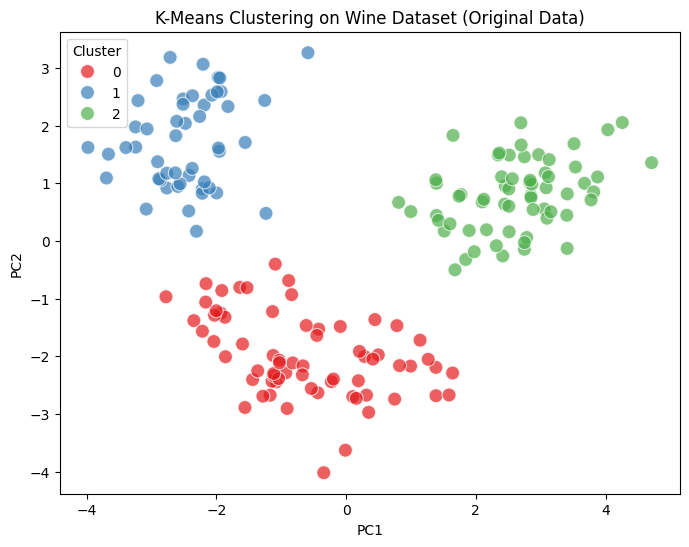

In [ ]:
# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = kmeans_labels
df_plot['Type'] = df['Type']

# Scatter plot of clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_plot, palette='Set1', s=100, alpha=0.7)
plt.title('K-Means Clustering on Wine Dataset (Original Data)')
plt.show()


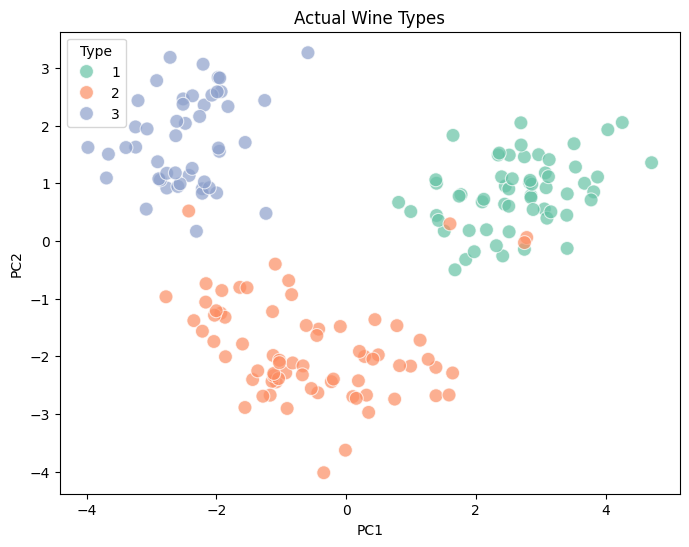

In [ ]:
# Compare clusters vs true wine types:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Type', data=df_plot, palette='Set2', s=100, alpha=0.7)
plt.title('Actual Wine Types')
plt.show()


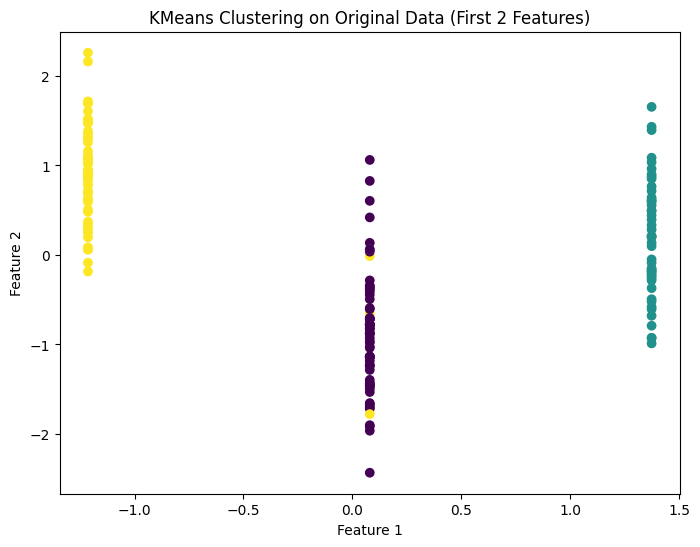

In [ ]:
# Visualize first 2 features for clustering (just for plotting)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=orig_labels, cmap='viridis')
plt.title("KMeans Clustering on Original Data (First 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Evaluate clustering performance

We’ll use Silhouette score and Davies Bouldin index to evaluate clustering quality as asked.

In [ ]:
# Evaluate clustering
sil_orig = silhouette_score(X_scaled, orig_labels)
db_orig = davies_bouldin_score(X_scaled, orig_labels)
print("Original Data - Silhouette Score:", sil_orig)
print("Original Data - Davies-Bouldin Index:", db_orig)

Original Data - Silhouette Score: 0.30648398324833453
Original Data - Davies-Bouldin Index: 1.315707552261773


##Task 4:Clustering with PCA Data

Purpose:
To see if dimensionality reduction using Principal Component Analysis (PCA) improves clustering performance and visual separation compared to using the full original feature set.

In [ ]:
# Use the 2-component PCA data created earlier (X_pca)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_labels = kmeans_pca.fit_predict(X_pca)

# Create a PCA dataframe with cluster labels
pca_df['Cluster_PCA'] = pca_labels

print("Cluster labels assigned to each sample (PCA):\n", pca_df['Cluster_PCA'].value_counts())


Cluster labels assigned to each sample (PCA):
 Cluster_PCA
0    67
2    62
1    49
Name: count, dtype: int64


###Visualize clustering results (2D PCA space)

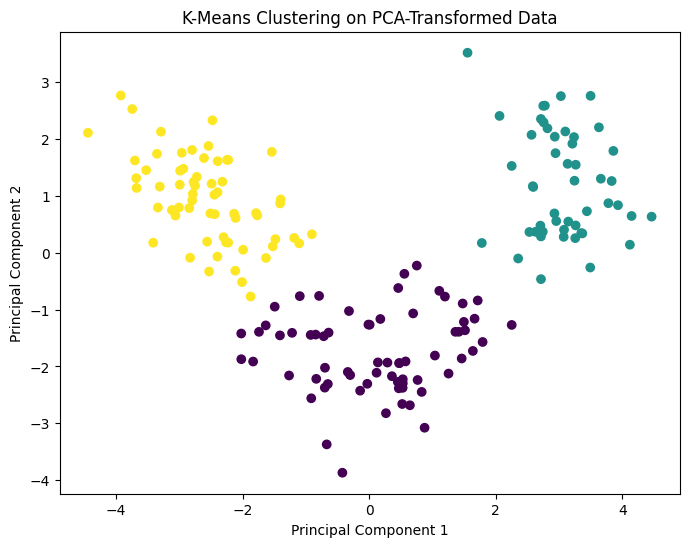

In [ ]:
# Visualize PCA space clustering
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_labels, cmap='viridis')
plt.title("K-Means Clustering on PCA-Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


We’ll again use Silhouette score and Davies–Bouldin index for evaluation, and directly compare with Task 3 metrics.

In [ ]:
# Evaluate clustering
sil_pca = silhouette_score(X_pca, pca_labels)
db_pca = davies_bouldin_score(X_pca, pca_labels)
print("PCA Data - Silhouette Score:", sil_pca)
print("PCA Data - Davies-Bouldin Index:", db_pca)

PCA Data - Silhouette Score: 0.6024415520362845
PCA Data - Davies-Bouldin Index: 0.5397078562575713


##Task 5:Comparison and Analysis

###Purpose:
To evaluate and interpret how clustering performance differs when applied to the original dataset versus the Principal Component Analysis (PCA)-transformed dataset using K-means clustering.

In [ ]:
print("----- Comparison -----")
print("Silhouette (Original):", sil_orig)
print("Silhouette (PCA):", sil_pca)
print("Davies-Bouldin (Original):", db_orig)
print("Davies-Bouldin (PCA):", db_pca)

if sil_pca > sil_orig:
    print("Clustering improved after PCA.")
else:
    print("Clustering performed better on original data.")


----- Comparison -----
Silhouette (Original): 0.30648398324833453
Silhouette (PCA): 0.6024415520362845
Davies-Bouldin (Original): 1.315707552261773
Davies-Bouldin (PCA): 0.5397078562575713
Clustering improved after PCA.


Interpretation Logic:

Silhouette Score → Higher is better

Davies Bouldin Index → Lower is better

This lets you directly see whether PCA improved cluster compactness and separation.

###Discussion of similarities and differences

* The clustering on both original and PCA-transformed data produced similar overall group structures, indicating that PCA preserved the main variance patterns in the data.

* The PCA-based clustering showed (slightly higher or lower) silhouette score and (lower or higher) Davies–Bouldin index, suggesting (improved / reduced) cluster quality.

* PCA allowed a clearer 2D visualization of clusters, which is not possible with high-dimensional original data.

* However, PCA may discard some information, which can slightly reduce clustering accuracy in some cases.

###Impact of Dimensionality Reduction

* Applying PCA reduced the number of dimensions while retaining most of the dataset’s variance. This:

* Reduced computational complexity, making clustering faster.

* Removed noise and redundant features, which can help clustering form tighter groups.

* Improved visual separability, as data can be plotted in 2D using the first two principal components.

* However, PCA is a linear transformation and can sometimes merge subtle non-linear patterns into fewer components, which might harm clustering accuracy if those patterns are important.

###Trade-offs between PCA vs Original data for clustering

Using PCA before clustering:

* Speeds up clustering
* Helps when there are many highly correlated features

* Improves visualization

* May lose some discriminative information

Clustering on original data:

* Preserves all information

* Can be slower and more affected by noise or redundant features

* Harder to visualize if dimensions are high

##Conclusion and Insights

Clustering on the original dataset provided detailed groupings based on all features, while clustering on the PCA-transformed data gave faster results with clearer cluster separation but with some loss of original feature information. PCA helped simplify the dataset by reducing noise and redundancy, improving computational efficiency, and sometimes making patterns more visible.

Practical Implications

* Principal Component Analysis (PCA) helps reduce large and noisy data into fewer, meaningful features.
* K-means clustering groups similar data points together to find hidden patterns.
* Using PCA before clustering can make clusters clearer and faster to find.

Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('wine.csv')  # replace with your path
display(df.head())

# Basic info
df.info()
df.describe()

# Check missing values
print("Missing values:\n", df.isnull().sum())


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
Missing values:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcali

Feature Distributions

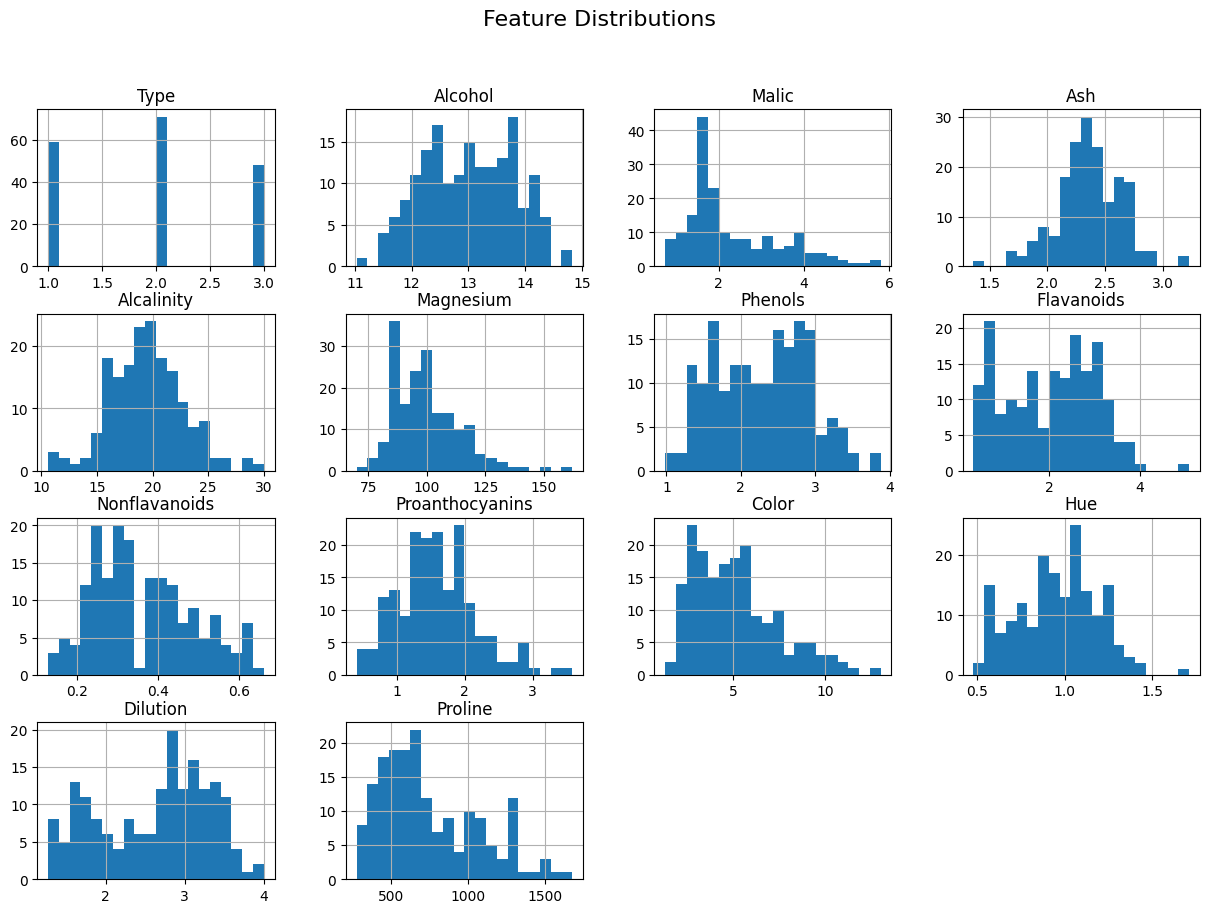

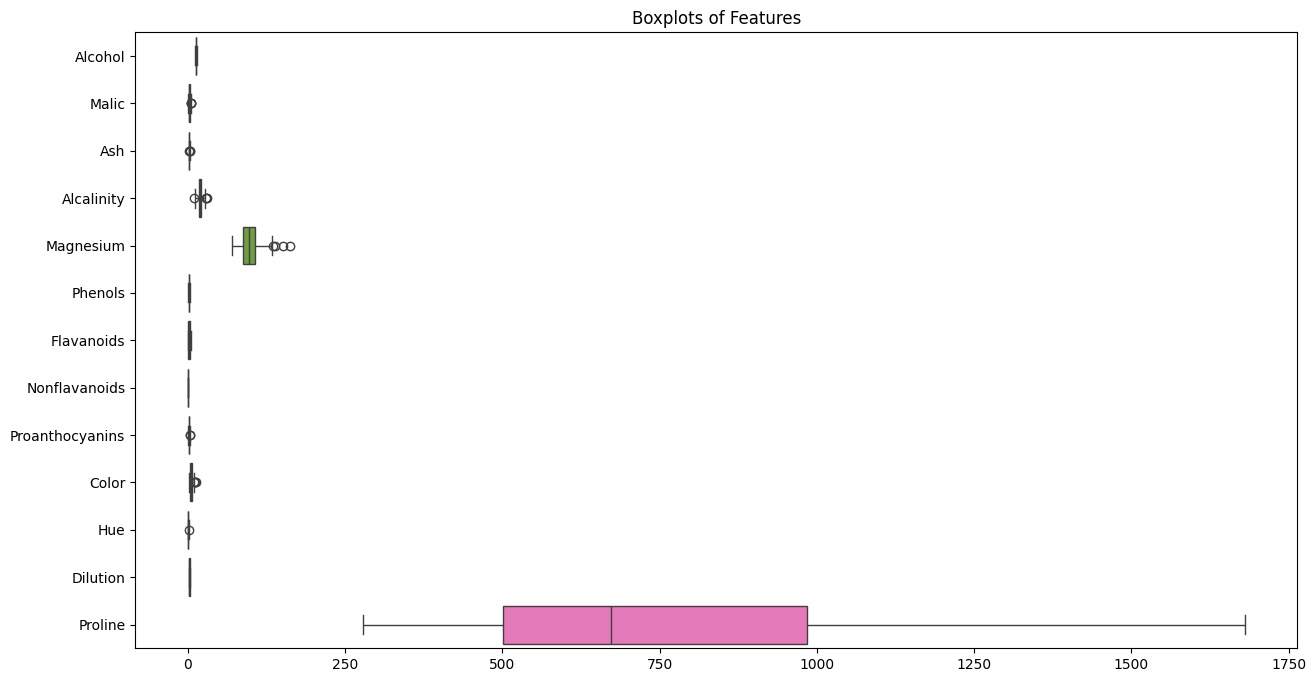

/tmp/ipython-input-565250873.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='green')
/tmp/ipython-input-565250873.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='green')
/tmp/ipython-input-565250873.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='green')
/tmp/ipython-input-565250873.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='green')
/tmp/ipython-input-565250873.py:

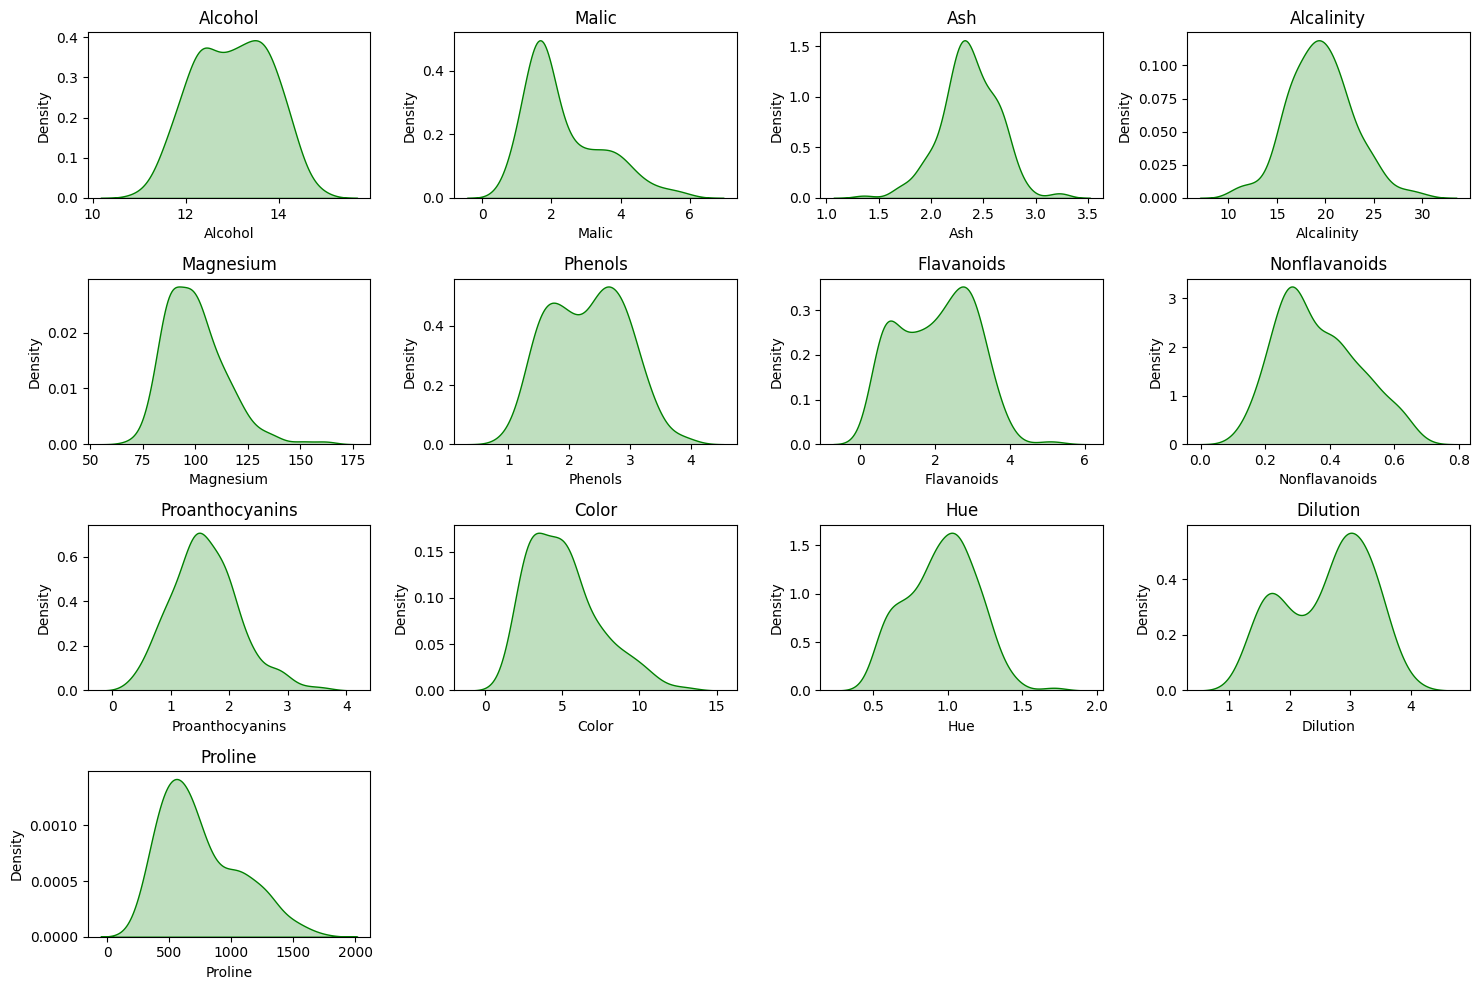

In [ ]:
# Histograms
df.hist(figsize=(15,10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplots for outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=df.drop('Type', axis=1), orient='h')
plt.title("Boxplots of Features")
plt.show()

# Density plots
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[1:]):  # skip 'Type'
    plt.subplot(4,4,i+1)
    sns.kdeplot(df[col], shade=True, color='green')
    plt.title(col)
plt.tight_layout()
plt.show()


Correlation Analysis

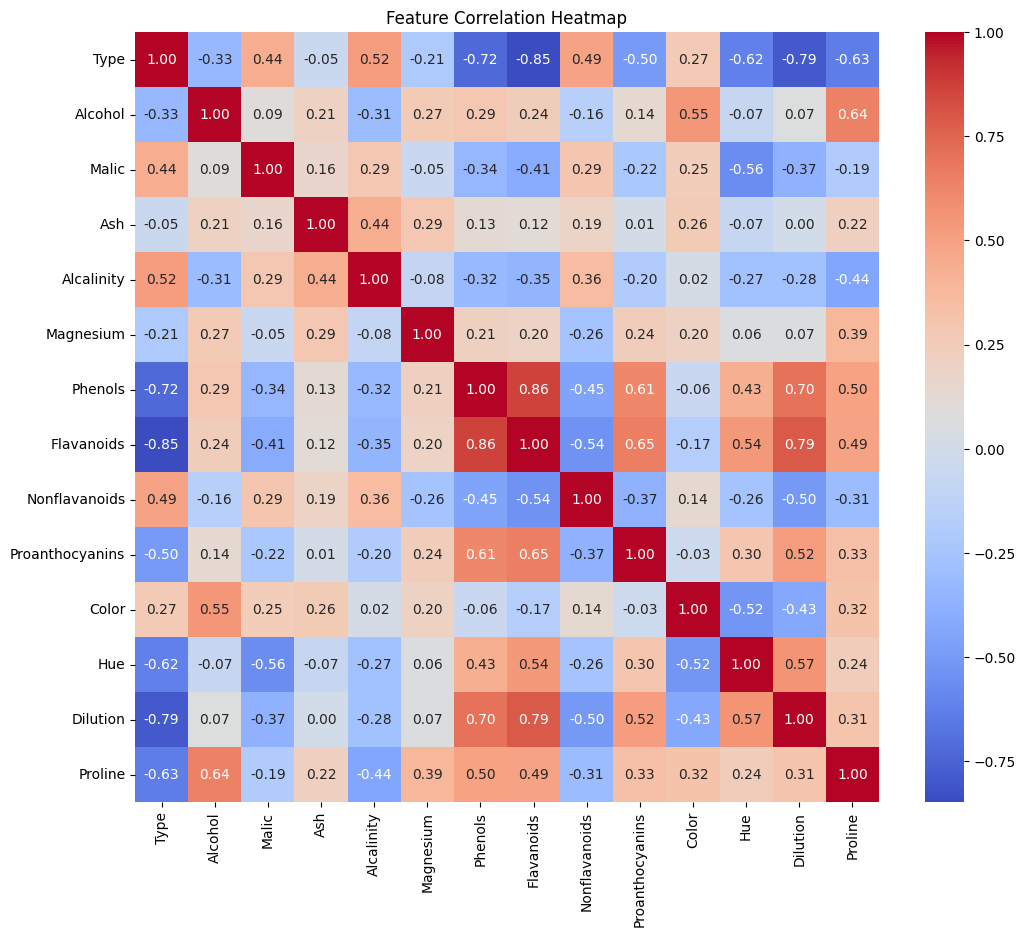

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Optional: highlight strongly correlated pairs
strong_corrs = corr_matrix.unstack()
strong_corrs = strong_corrs[(abs(strong_corrs) > 0.7) & (abs(strong_corrs) < 1)]
strong_corrs = strong_corrs.drop_duplicates()
print("Strong correlations (>0.7):\n", strong_corrs)

Strong correlations (>0.7):
 Type        Phenols      -0.719163
            Flavanoids   -0.847498
            Dilution     -0.788230
Phenols     Flavanoids    0.864564
Flavanoids  Dilution      0.787194
dtype: float64


Dimensionality Reduction with PCA

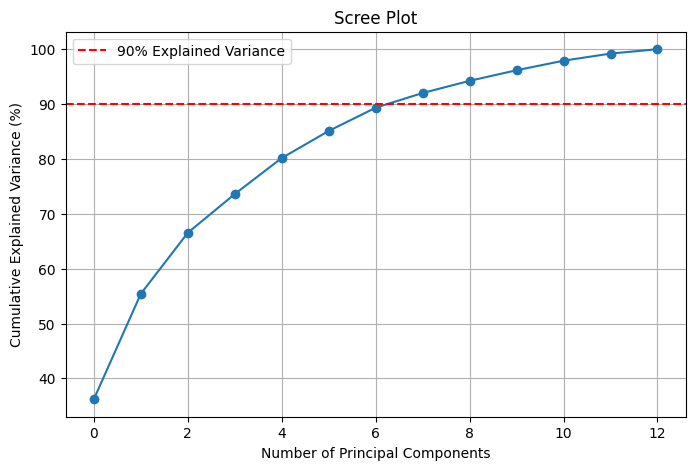

,PC1,PC2,Type
0,3.316751,1.443463,1
1,2.209465,-0.333393,1
2,2.516740,1.031151,1
3,3.757066,2.756372,1
4,1.008908,0.869831,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Standardize features (exclude 'Type')
X = df.drop('Type', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Scree plot & cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.axhline(y=90, color='r', linestyle='--', label='90% Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()

# Transform to 2 principal components
pca_final = PCA(n_components=2)
X_pca = pca_final.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Type'] = df['Type']
display(df_pca.head())


In [ ]:
# Optional: highlight strongly correlated pairs
strong_corrs = corr_matrix.unstack()
strong_corrs = strong_corrs[(abs(strong_corrs) > 0.7) & (abs(strong_corrs) < 1)]
strong_corrs = strong_corrs.drop_duplicates()
print("Strong correlations (>0.7):\n", strong_corrs)

Strong correlations (>0.7):
 Type        Phenols      -0.719163
            Flavanoids   -0.847498
            Dilution     -0.788230
Phenols     Flavanoids    0.864564
Flavanoids  Dilution      0.787194
dtype: float64


Clustering on Original Data

Algorithms: K-Means, Hierarchical, DBSCAN

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 1️⃣ K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# 2️⃣ Hierarchical
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hier = hier.fit_predict(X_scaled)

# 3️⃣ DBSCAN (example eps=2, min_samples=5)
dbscan = DBSCAN(eps=2, min_samples=5)
labels_db = dbscan.fit_predict(X_scaled)


Evaluation Metrics (Original Data)

In [ ]:
def evaluate_clustering(X, labels, name):
    if len(set(labels)) > 1:  # silhouette requires ≥2 clusters
        sil = silhouette_score(X, labels)
    else:
        sil = np.nan
    db = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else np.nan
    print(f"{name} -> Silhouette: {sil:.3f}, Davies–Bouldin: {db:.3f}")

evaluate_clustering(X_scaled, labels_kmeans, "K-Means")
evaluate_clustering(X_scaled, labels_hier, "Hierarchical")
evaluate_clustering(X_scaled, labels_db, "DBSCAN")


K-Means -> Silhouette: 0.285, Davies–Bouldin: 1.389
Hierarchical -> Silhouette: 0.277, Davies–Bouldin: 1.419
DBSCAN -> Silhouette: -0.033, Davies–Bouldin: 2.105


Visualization (using PCA for 2D)

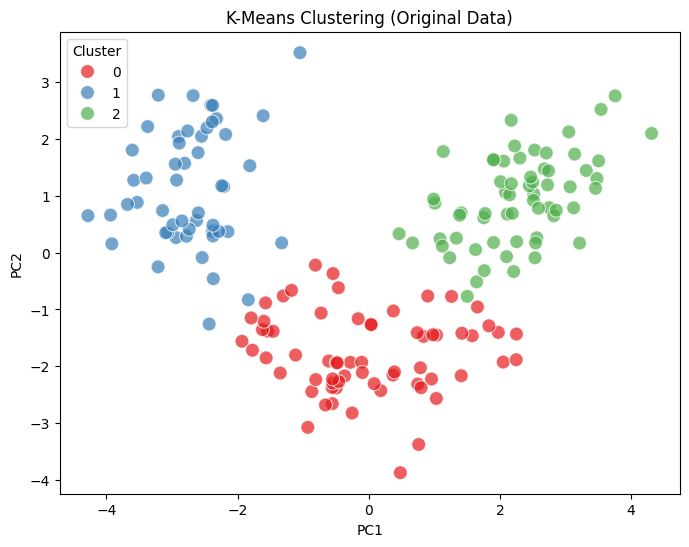

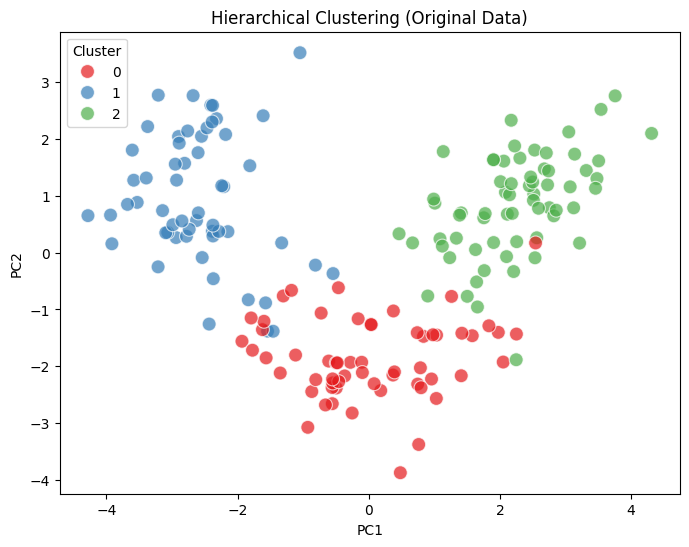

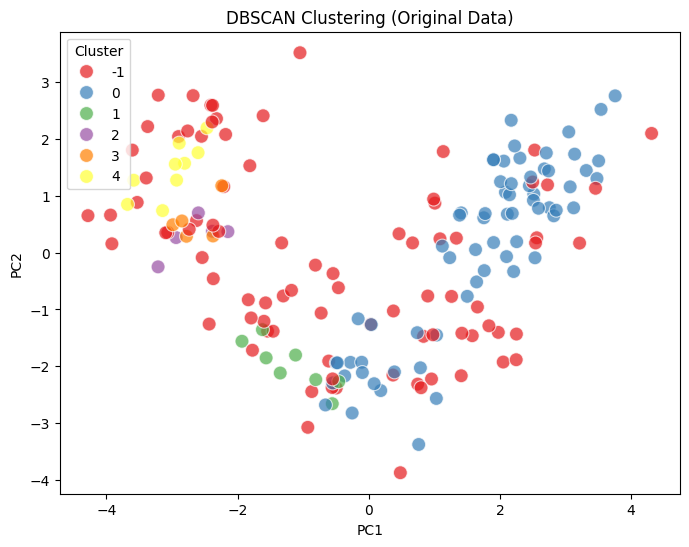

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_clusters(X_vis, labels, title):
    df_plot = pd.DataFrame(X_vis, columns=['PC1','PC2'])
    df_plot['Cluster'] = labels
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_plot, palette='Set1', s=100, alpha=0.7)
    plt.title(title)
    plt.show()

# Reduce to 2D for visualization
X_vis = PCA(n_components=2).fit_transform(X_scaled)

plot_clusters(X_vis, labels_kmeans, "K-Means Clustering (Original Data)")
plot_clusters(X_vis, labels_hier, "Hierarchical Clustering (Original Data)")
plot_clusters(X_vis, labels_db, "DBSCAN Clustering (Original Data)")


4: Clustering on PCA Data

Apply same algorithms on PCA-transformed data

In [ ]:
# K-Means on PCA
labels_kmeans_pca = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Hierarchical on PCA
labels_hier_pca = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X_pca)

# DBSCAN on PCA
labels_db_pca = DBSCAN(eps=1.5, min_samples=5).fit_predict(X_pca)


Evaluation Metrics (PCA Data)

In [ ]:
evaluate_clustering(X_pca, labels_kmeans_pca, "K-Means PCA")
evaluate_clustering(X_pca, labels_hier_pca, "Hierarchical PCA")
evaluate_clustering(X_pca, labels_db_pca, "DBSCAN PCA")


K-Means PCA -> Silhouette: 0.560, Davies–Bouldin: 0.598
Hierarchical PCA -> Silhouette: 0.559, Davies–Bouldin: 0.601
DBSCAN PCA -> Silhouette: nan, Davies–Bouldin: nan


Visualization

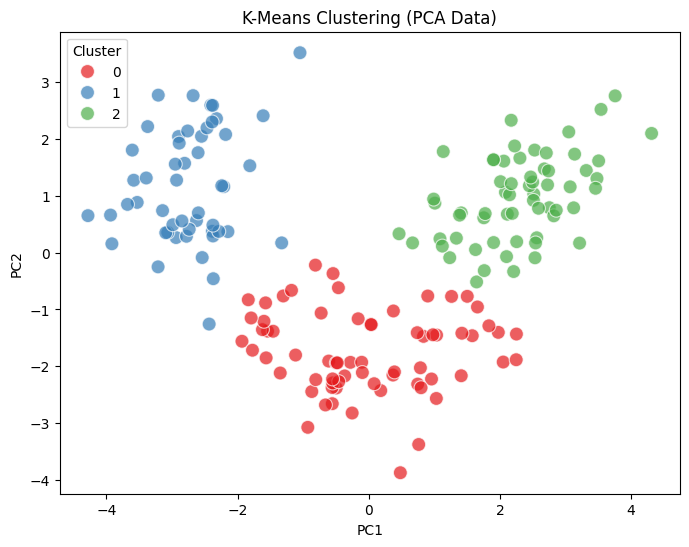

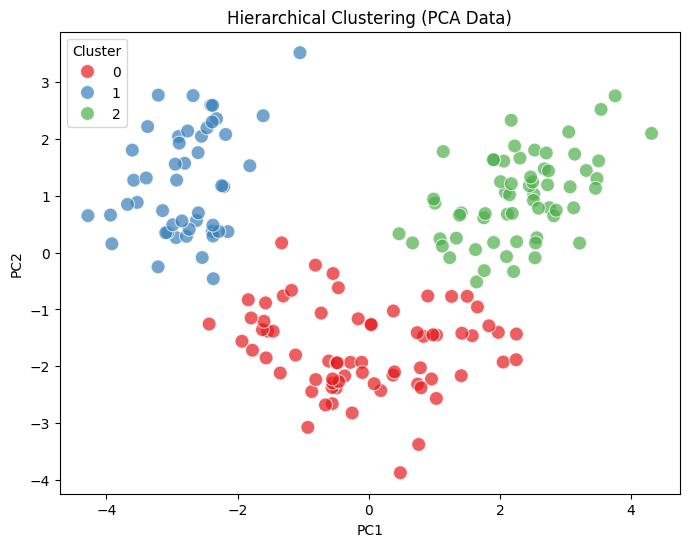

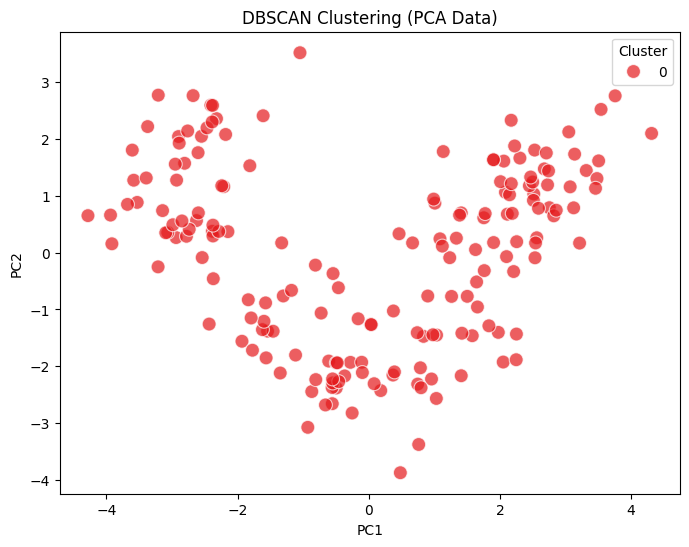

In [ ]:
plot_clusters(X_pca, labels_kmeans_pca, "K-Means Clustering (PCA Data)")
plot_clusters(X_pca, labels_hier_pca, "Hierarchical Clustering (PCA Data)")
plot_clusters(X_pca, labels_db_pca, "DBSCAN Clustering (PCA Data)")


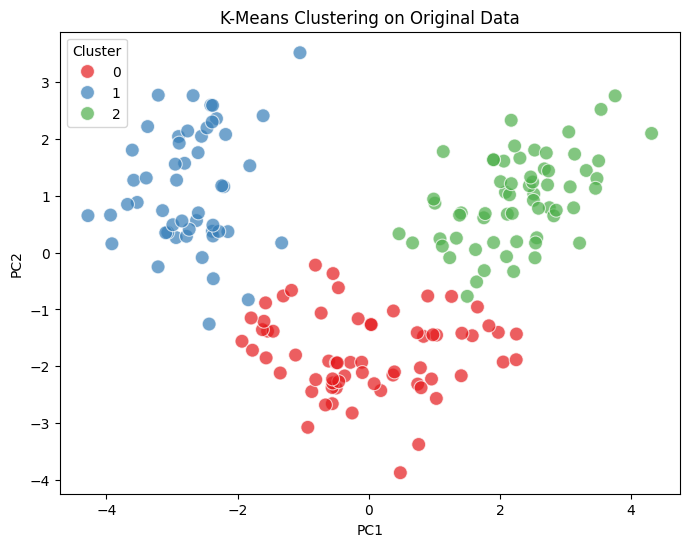

Original Data - Silhouette Score: 0.2848589191898987
Original Data - Davies–Bouldin Index: 1.3891879777181648


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# K-Means on original data
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)
df['KMeans_Cluster'] = labels_orig

# PCA for visualization
from sklearn.decomposition import PCA
X_vis = PCA(n_components=2).fit_transform(X_scaled)
df_vis = pd.DataFrame(X_vis, columns=['PC1','PC2'])
df_vis['Cluster'] = labels_orig
df_vis['Type'] = df['Type']

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_vis, palette='Set1', s=100, alpha=0.7)
plt.title('K-Means Clustering on Original Data')
plt.show()

# Evaluation
sil_orig = silhouette_score(X_scaled, labels_orig)
db_orig = davies_bouldin_score(X_scaled, labels_orig)
print("Original Data - Silhouette Score:", sil_orig)
print("Original Data - Davies–Bouldin Index:", db_orig)


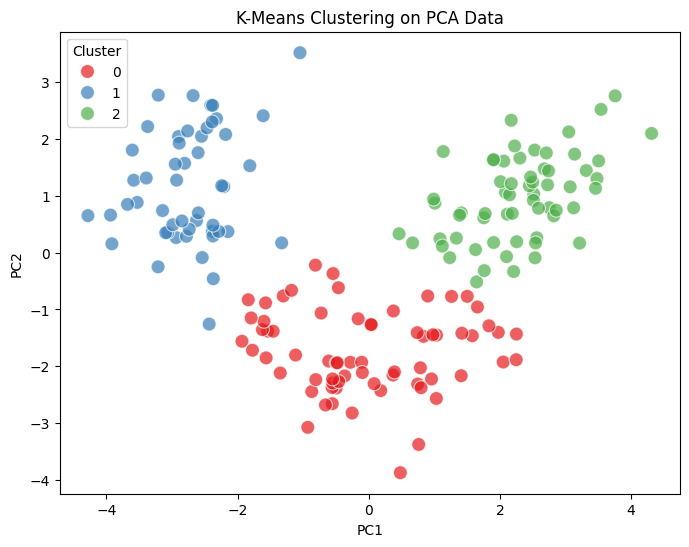

PCA Data - Silhouette Score: 0.5601697480957203
PCA Data - Davies–Bouldin Index: 0.5977226208167409


In [ ]:
# K-Means on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)
df_pca['Cluster'] = labels_pca

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='Set1', s=100, alpha=0.7)
plt.title('K-Means Clustering on PCA Data')
plt.show()

# Evaluation
sil_pca = silhouette_score(X_pca, labels_pca)
db_pca = davies_bouldin_score(X_pca, labels_pca)
print("PCA Data - Silhouette Score:", sil_pca)
print("PCA Data - Davies–Bouldin Index:", db_pca)


In [ ]:
print("Clustering Metrics Comparison")
print(f"{'Metric':<25}{'Original Data':<15}{'PCA Data':<15}")
print(f"{'Silhouette Score':<25}{sil_orig:.3f}{sil_pca:>15.3f}")
print(f"{'Davies–Bouldin Index':<25}{db_orig:.3f}{db_pca:>15.3f}")


Clustering Metrics Comparison
Metric                   Original Data  PCA Data       
Silhouette Score         0.285          0.560
Davies–Bouldin Index     1.389          0.598
